In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<div style='color:olive'>train_test_split separa cada vez que lo llamamos los datos de forma diferente. Para poder comparar modelos, hacer un código más limpio y compacto y para poder hacer nuestros experimentos reproducibles utilizaremos el parametro **random_state**.</div>

In [3]:
x = pd.read_csv('./data/x_opening.csv')
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis=1)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [5]:
x_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
381,80000000.0,2014.0,2.35,134.0,20411.0,68000000.0,7.6,82251953.0,3313.0
34,200000000.0,2013.0,2.35,130.0,73441.0,215000000.0,6.4,79110453.0,3912.0
686,55000000.0,2003.0,2.35,111.0,3983.0,30000000.0,8.1,22089322.0,3102.0
272,95000000.0,1997.0,2.35,126.0,39319.0,93000000.0,7.7,17031345.0,2500.0
1429,26000000.0,2014.0,2.35,118.0,3197.0,26000000.0,6.7,10003827.0,2936.0


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
246,100000000.0,1996.0,2.350000,115.0,3454.0,1.000000e+08,6.1,24566446.0,2410.0
777,50000000.0,2011.0,1.850000,109.0,15608.0,6.000000e+07,6.1,22755854.0,3.0
2135,12000000.0,2012.0,1.850000,93.0,2043.0,1.200000e+07,6.7,21051363.0,3055.0
1792,19000000.0,2012.0,2.350000,121.0,3260.0,5.329615e+07,6.4,2603370.0,2515.0
2219,10100000.0,2010.0,2.157506,144.0,1121.0,5.329615e+07,5.3,642156.0,82.0


<div style='color:olive'>Vemos como varian los datos de x_train, con cada llamada de train_test_split, y esto no ayuda para que los analisis sean reproducibles.  Podemos controlar esta aleatoriedad con el metodo random_state.</div>

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y, random_state=1)

pd.DataFrame.equals(x_train, x2_train)

True

<div style='color:olive'>Vemos que ahora los dos dataFrame son iguales. train_test_split es muy util para prototipar, ya que no es costoso computacionalmente, y para evaluar el performance, al final del modelaje.</div>

<h2 style='color:lime'> Cross Validation</h2>

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# cv -> numero de folds en los que separo mis datos
score = cross_val_score(Lasso(), x,y, cv=5, scoring='r2')
score

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [9]:
print('score of test: ',score.mean())

score of test:  0.44964021745791777


<div style='color:olive'>Ahora comparemos con el score de un train_test_split.</div>

In [10]:
Lasso().fit(x_train, y_train).score(x_test, y_test)

0.7926190294963362

<div style='color:olive'>un score muy optimista :(</div>

<h2 style='color:lime'> Seleccion de modelos.</h2>

<div style='color:olive'>Veamos si estamos en overfitting o en underfitting</div>

In [11]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(), x,y, return_train_score=True, cv=5)
results

{'fit_time': array([0.03478384, 0.03274894, 0.03264022, 0.03359485, 0.01941466]),
 'score_time': array([0.00058484, 0.00054121, 0.00054789, 0.00049019, 0.00046778]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [12]:
print('mean test_score',np.mean(results['test_score']))
print('mean train_score',np.mean(results['train_score']))

mean test_score 0.44964021745791777
mean train_score 0.7491178363039036


<div style='color:olive'>Como los dos scores son bastante diferentes, tenemos una varianza alta (overfitting), sin embargo, un score de 0.7 en entrenamiento no es muy bueno, asi que podemos decir que el modelo tiene sesgo. Lasso() no puede modelar muy bien los datos. Buscaremos otro. </div>

<h2 style='color:lime'>Curvas de validacion.</h2>

In [13]:
# vecinos cercanos
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(), x,y, cv=5) # default 5 vecinos

{'fit_time': array([0.01839805, 0.00211811, 0.00195861, 0.00220346, 0.00199699]),
 'score_time': array([0.00367928, 0.00560737, 0.00439668, 0.00441217, 0.00335836]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077]),
 'train_score': array([0.73553883, 0.78647652, 0.78386739, 0.77876542, 0.77477287])}

<div style='color:olive'>El score no mejoro, asi que cambiaremos el numero de vecinos.</div>

In [14]:
cross_validate(KNeighborsRegressor(n_neighbors=10), x,y, cv=5)

{'fit_time': array([0.00221968, 0.00204635, 0.0020175 , 0.0019474 , 0.00198126]),
 'score_time': array([0.00366139, 0.00533342, 0.00529933, 0.00480914, 0.004076  ]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ]),
 'train_score': array([0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953])}

<div style='color:olive'>Empeoraron los scores.  Necesitamos probar con varios numeros de vecinos, pero lo podemos hacer de forma sistematica con la curva de validacion.</div>

In [15]:
from sklearn.model_selection import validation_curve

n = np.arange(2,50,2)

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                             x,y, 
                                             param_name = 'n_neighbors',
                                             param_range = n,
                                             cv = 5)

In [16]:
np.mean(train_scores, axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

Text(0,0.5,'score')

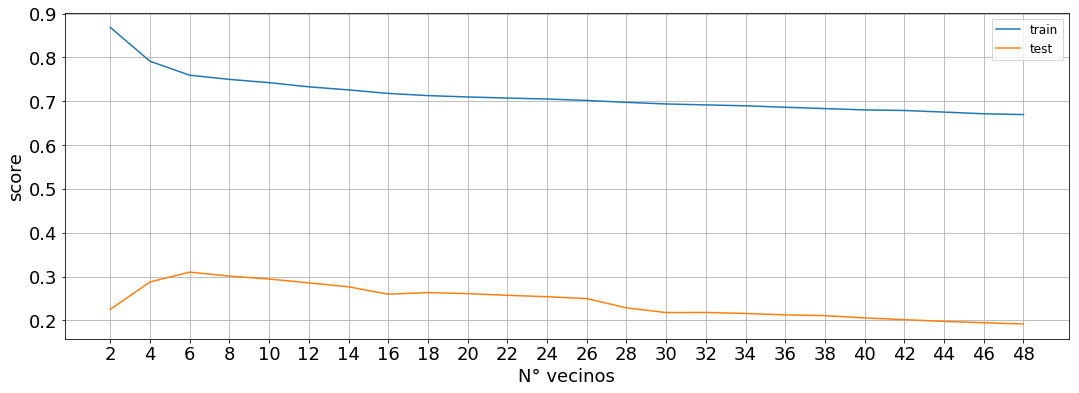

In [17]:
plt.figure(figsize=(18,6))
plt.plot(np.mean(train_scores, axis=1), label='train')
plt.plot(np.mean(test_scores, axis=1), label='test')
plt.xticks(np.arange(24),n, fontsize=18);
plt.yticks(fontsize=18)
plt.grid(True)
plt.legend(loc=0,fontsize=12)
plt.xlabel('N° vecinos',fontsize=18)
plt.ylabel('score',fontsize=18)

<div style='color:olive'> El mejor caso es con 6 vecinos, pero aun así hay una gran brecha entre train y test, por lo que debemos buscar otro modelo</div>

<h2 style='color:lime'>Curvas de aprendizaje.</h2>

In [18]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=6), x,y, cv=5)
lc

(array([ 177,  577,  976, 1376, 1776]),
 array([[0.73137814, 0.54347388, 0.54347388, 0.54347388, 0.54347388],
        [0.7172216 , 0.6874683 , 0.67612525, 0.67612525, 0.67612525],
        [0.72048185, 0.74489894, 0.7303819 , 0.7216836 , 0.7216836 ],
        [0.71867144, 0.76263478, 0.7569267 , 0.74900356, 0.74853204],
        [0.71882872, 0.77524359, 0.77285199, 0.76729186, 0.76245665]]),
 array([[ 3.33418389e-01, -1.59695814e+00, -8.82111210e+00,
         -1.86782000e+01, -2.29247727e+01],
        [ 3.54518984e-01,  5.82744244e-01,  2.74286697e-01,
         -2.09063033e-01, -1.90604803e-01],
        [ 3.53902555e-01,  5.94866605e-01,  1.62689828e-01,
         -3.52114650e-01, -3.12381914e-01],
        [ 3.53902555e-01,  5.92497990e-01,  1.60518983e-01,
          6.23338761e-02, -2.06197589e-02],
        [ 3.52641569e-01,  5.98627520e-01,  2.06512855e-01,
          1.45302738e-01,  2.29903192e-01]]))

<div style='color:olive'> El primer array nos muestra el numero de datos con los que se entreno el modelo. Primero se entreno con 177 datos, luego con 577 ...  <br> Esta curva evalua como se comporta el modelo con pocos datos y con muchos datos. Si el score va mejorando, podemos concluir que el modelo esta "aprendiendo"</div>

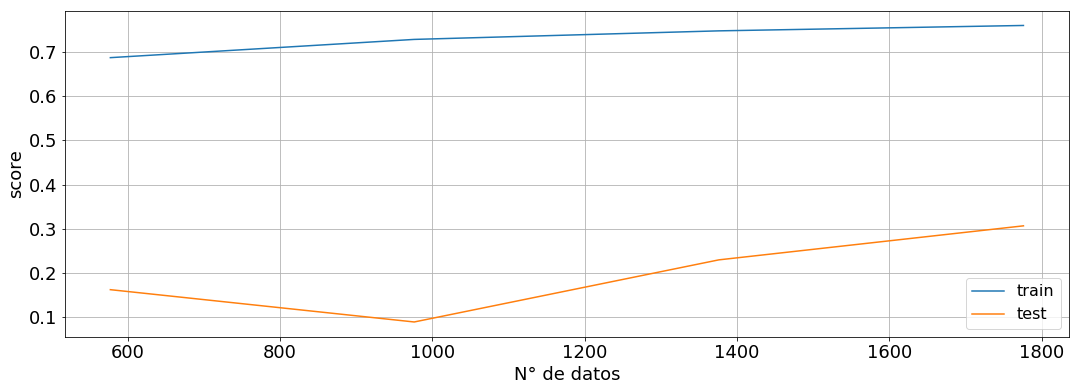

In [19]:
samples, train, test = lc[0], lc[1], lc[2]

plt.figure(figsize=(18,6))
plt.grid(True)
plt.plot(samples[1:], np.mean(train, axis=1)[1:], label='train')
plt.plot(samples[1:], np.mean(test, axis=1)[1:], label='test')
plt.legend(loc=0, fontsize=16)
plt.xlabel('N° de datos', fontsize=18)
plt.ylabel('score',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

<div style='color:olive'> Se necesitan mas datos para que el modelo pueda aprende mas. La curva debe tender a una asintota, que es cuando ya no puede aprender mas.</div>

<h2 style='color:lime'>Decision Trees </h2>

In [20]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=2)

In [21]:
model.fit(x_train, y_train);

In [26]:
from sklearn.tree import export_graphviz
import graphviz

In [27]:
treedot = export_graphviz(model, out_file=None, feature_names=x.columns)

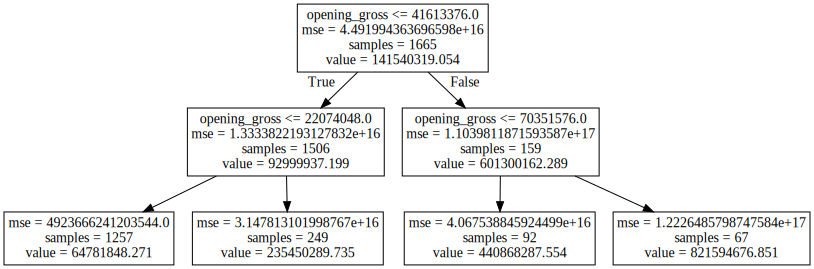

In [29]:
graphviz.Source(treedot)

<h2 style='color:lime'>Random Forest </h2>

In [32]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
results = cross_validate(forest, x,y, cv=5, scoring='r2')

In [33]:
print('train score: ', np.mean(results['train_score']))
print('test score: ', np.mean(results['test_score']))

train score:  0.9663737375652346
test score:  0.5233802776796315


<div style='color:olive'> Un score mucho mejor que Lasso(), sin embargo aun tenemos una diferencia importante entre los scores de train y test (overfitting)</div>

<h2 style='color:lime'>Gradient Boosted Tresss</h2>

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble, x,y, cv=5, scoring='r2')

In [36]:
print('train score: ', np.mean(results['train_score']))
print('test score: ', np.mean(results['test_score']))

train score:  0.9151392143549633
test score:  0.5280114722371501


<div style='color:olive'> Optimicemos los parámetros para este modelo. (<b>Hiperparámetros</b>)</div>

<h2 style='color:lime'> Optimización hiperparámetros</h2>

In [37]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators': range(20,501,20)}

In [38]:
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

In [39]:
gsearch1 = GridSearchCV(estimator,
                       param_grid = param_test1,
                       scoring = 'r2',
                       cv = 5)

In [40]:
gsearch1.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=500,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(20, 501, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [46]:
gsearch1.cv_results_

{'mean_fit_time': array([0.03307166, 0.05707684, 0.06262422, 0.11378026, 0.09836259,
        0.12309542, 0.13871469, 0.17148738, 0.18746095, 0.21075892,
        0.22907147, 0.24406681, 0.29001646, 0.30638971, 0.3009294 ,
        0.330196  , 0.34017196, 0.37504058, 0.37776794, 0.40430045,
        0.41583862, 0.4362021 , 0.45977097, 0.48925872, 0.48685923]),
 'mean_score_time': array([0.00078778, 0.00090923, 0.00115762, 0.00121994, 0.00147095,
        0.00173707, 0.00190773, 0.00192389, 0.00196557, 0.0023119 ,
        0.00234146, 0.00267076, 0.0047163 , 0.00303974, 0.0033463 ,
        0.00332127, 0.00344496, 0.00367184, 0.00403633, 0.00465693,
        0.00412035, 0.00412884, 0.00458903, 0.00465097, 0.00472727]),
 'mean_test_score': array([0.65533772, 0.71947072, 0.73472393, 0.73893391, 0.74204852,
        0.74593224, 0.74954068, 0.75081976, 0.75256545, 0.7534906 ,
        0.75456927, 0.75530597, 0.75517149, 0.75388522, 0.75460231,
        0.75250064, 0.75350086, 0.75354341, 0.75258576, 0

In [47]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 240}, 0.7553059694284987)

<div style='color:olive'>El mejor caso es con 240 estimadores, lo cual da un score de 0.7553</div>

In [43]:
final_results = cross_validate(gsearch1.best_estimator_, x_train,y_train)

In [48]:
print('train score: ', np.mean(final_results['train_score']))
print('test score: ', np.mean(final_results['test_score']))

train score:  0.8183169366503803
test score:  0.74138761251573


<div style='color:olive'>Ahora que tenemos un muy buen performance, vamos a entrenar con todos los datos de entrenamiento, pero evaluar en los datos de test.</div>

In [49]:
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10,
                                     n_estimators=240)

In [50]:
estimator.fit(x_train, y_train) # entrenamos

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=500,
             min_weight_fraction_leaf=0.0, n_estimators=240,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False)

In [51]:
estimator.score(x_test, y_test) # evaluamos

0.8092888852563106